In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

원본 이미지를 준비하자. 색은 흑백이므로, depth가 1이 된다.

(1, 3, 3, 1)
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


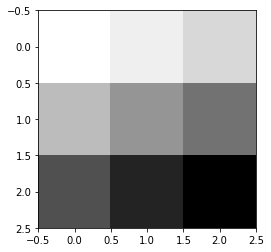

In [8]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],[[4],[5],[6]],[[7],[8],[9]]]], dtype = np.float32)

print(image.shape)
plt.imshow(image.reshape(3,3), cmap="Greys")
print(image.reshape(3,3))

image.shape:  (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


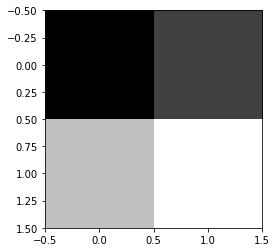

In [14]:
print("image.shape: ", image.shape)

# 필터의 개수는 1이고, 깊이는 1이며 2 by 2로 하겠다.
weight = tf.constant([[[[1.]],[[1.]]],
                       [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = "VALID")
conv2d_img = conv2d.eval()

# conv레이어를 실행하고, 그 후의 모양을 찍어보자.
print("conv2d_img.shape", conv2d_img.shape)

# 필터의 개수가 맨뒤에 있었으니까 맨 앞으로 보내서 필터가 n개 있다는 걸 알려줘야한다.
# 맨앞의 원소가 몇개의 데이터가 있는지 알려주는 부분이었기 때문이다. 
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one in enumerate(conv2d_img):
    # 양옆 끝의 두개 잘라낸다.
    print(one.reshape(2,2))
    plt.subplot(1,1,i+1), plt.imshow(one.reshape(2,2), cmap='gray')
    

conv의 결과가 2 by 2가 되었다.

이제 padding을 사용하여 정보의 손실을 막아보자

img shape:  (1, 3, 3, 1)
weight shape:  (2, 2, 1, 1)
conv2d.shape:  (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


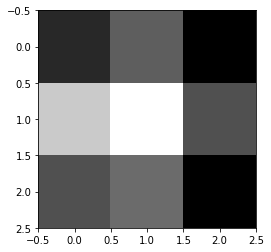

In [18]:
print("img shape: ",image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight shape: ", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding ='SAME')
conv2d_img = conv2d.eval()
print("conv2d.shape: ",conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0,3)
for i, one in enumerate(conv2d_img):
    print(one.reshape(3,3))
    plt.subplot(1,1,i+1), plt.imshow(one.reshape(3,3), cmap='gray')

필터가 다수개일 경우를 보도록 하자

img shape:  (1, 3, 3, 1)
weight shape:  (2, 2, 1, 3)
conv2d.shape:  (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


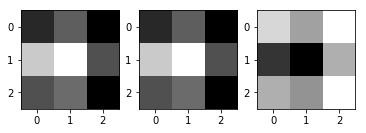

In [19]:
print("img shape: ",image.shape)

# 필터가 세개니 가중치의 원소 수도 달라진다.
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight shape: ", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding ='SAME')
conv2d_img = conv2d.eval()
print("conv2d.shape: ",conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0,3)
for i, one in enumerate(conv2d_img):
    print(one.reshape(3,3))
    # 이미지가 세개가 나오니 자리를 3개 만들어줘야한다.
    plt.subplot(1,3,i+1), plt.imshow(one.reshape(3,3), cmap='gray')

Pooling을 해볼차례이다.

In [20]:
image = np.array([[[[4],[3]],[[2],[1]]]])

# 모양은 strides 파라미터를 줄 때 처럼 입력하면 된다.
pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding="SAME")

print("pool.shape: ", pool.shape)
print(pool.eval())

pool.shape:  (1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]


패딩을 넣어주었기 때문에 결과는 2 by 2 로 인풋과 크기가같다.

MINST 데이터로 conv를 실행해보자

> 데이터들을 쭉 늘어진 1차원의 배열 형태로 가져와준다.

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


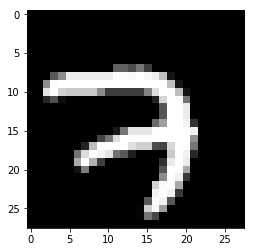

In [27]:
# 첫번째 이미지를 가져오며, 늘어선 데이터를 28 * 28 의 형태로 가져온다
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img,cmap='gray')

Tensor("Conv2D_14:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 14, 14, 1)
Tensor("Conv2D_14:0", shape=(1, 14, 14, 5), dtype=float32)


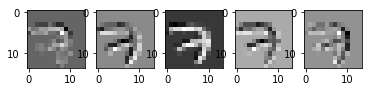

In [38]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev = 0.01))

conv2d = tf.nn.conv2d(img, W1, strides = [1,2,2,1], padding = "SAME")
print(conv2d)

sess.run(tf.global_variables_initializer())

conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img,0,3)
print(conv2d_img.shape)
print(conv2d)

for i, one in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one.reshape(14,14), cmap='gray')


잘 된것 같다. 이제 풀링을 해보자

Tensor("MaxPool_3:0", shape=(1, 7, 7, 5), dtype=float32)


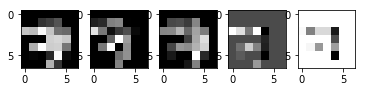

In [42]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding ="SAME")

print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img,0,3)

# strides를 2로 주어서 크기가 변화하였으니 해당 숫자만 바꿔주면 된다. 필터는 사용하지 않았으므로 필터의 수 (depth)는 같다.
for i, one in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one.reshape(7,7), cmap='gray')


사이즈를 줄여 해상도가 떨어지긴 하지만, 특징은 남아있다!